<center> # Naiwny klasyfikator bayesowski</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasywikatora bayesowskiego. 

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from IPython.display import display

Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [2]:

df = pd.read_csv('data.csv', sep=',')
df


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [3]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('Dane tekstowe zawierają kolumny :\n\n', categorical)

df[categorical].head()

Dane tekstowe zawierają kolumny :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [4]:
df.replace(" ?",np.NaN, inplace = True)
def howManyNans(df: pd.DataFrame):
    for column in df.columns:
        count_nan = df[column].isnull().sum()
        if count_nan == 0:
            print("NaN value do not exist in columns")
        else:
            print("There is {} NaN values in column named {}".format(count_nan, column))

howManyNans(df)
df[categorical].isnull().sum()

NaN value do not exist in columns
There is 1836 NaN values in column named workclass
NaN value do not exist in columns
NaN value do not exist in columns
NaN value do not exist in columns
NaN value do not exist in columns
There is 1843 NaN values in column named occupation
NaN value do not exist in columns
NaN value do not exist in columns
NaN value do not exist in columns
NaN value do not exist in columns
NaN value do not exist in columns
NaN value do not exist in columns
There is 583 NaN values in column named native_country
NaN value do not exist in columns


workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

In [5]:
df.dropna(inplace=True) #usuwam wartości NaN z kolumn
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

Na przygotowanych danych przeprowadź proces tworzenia zbiorów uczących i testowych, tak by klasyfikator rozpoznawał do której z grup w kolumnie 'income' należy opisywana osoba


In [6]:
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native_country'].fillna(df['native_country'].mode()[0], inplace=True)

X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tektowych z pozostałych kategorii na wartości liczbowe:

In [7]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship',
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


cols = X_train.columns
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,fnlwgt,education_1,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,0.368421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.372342,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.263158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.792790,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.368421,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.246635,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.736842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.570154,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.894737,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.216799,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację daych ze zbiorów testowych i treningowych. Podaj dokładnosć modelu i macierz błędu wraz z jej wykresem i interpretacją.

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

display(y_pred)


array([' <=50K', ' <=50K', ' >50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [9]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
y_pred_train = gnb.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

y_test.value_counts()
null_accuracy = (6764/(6764+2285))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))


Model accuracy score: 0.7998
Training-set accuracy score: 0.8032
Training set score: 0.8032
Test set score: 0.7998
Null accuracy score: 0.7475


Dokładność naszego modelu wynosi 0.7998 a tzw. null accuaracy wynosi 0.7475. W związku z czym możemy powiedzieć model klasyfikacja danych za pomocą GaussianNB jest dobra w predykcji odpowiednich danych.

Confusion matrix

 [[5401 1363]
 [ 449 1836]]

True Positives(TP) =  5401

True Negatives(TN) =  1836

False Positives(FP) =  1363

False Negatives(FN) =  449


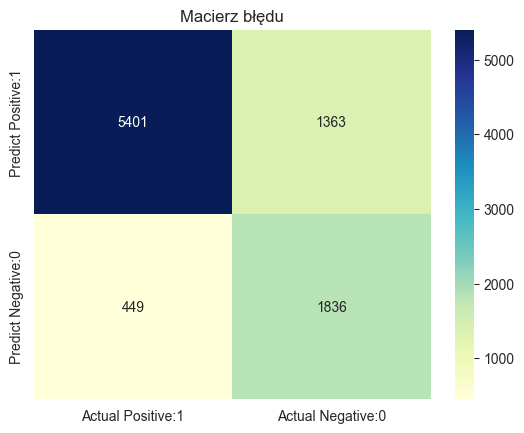

In [10]:

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Macierz błędu")
plt.show()

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.92      0.80      0.86      6764
        >50K       0.57      0.80      0.67      2285

    accuracy                           0.80      9049
   macro avg       0.75      0.80      0.76      9049
weighted avg       0.84      0.80      0.81      9049



**Dla wartości income <=50k:**
Współczynnik precision ma wartość 0.92 co oznacza, że 92% predykcji jest poprawnych względem wszystkich  predykcji. Współczynnik recall na poziomie 0.80 mówi nam, że otrzynaliśmy 80% pozytywnych predykcji w stosunku do rzeczywistych pozytywnych predykcji.

**Dla wartości income >50k:**
Współczynnik precision ma wartość 0.57 co oznacza, że 57% predykcji jest poprawnych względem wszystkich  predykcji. Współczynnik recall na poziomie 0.80 mówi nam, że otrzynaliśmy 80% pozytywnych predykcji w stosunku do rzeczywistych pozytywnych predykcji.

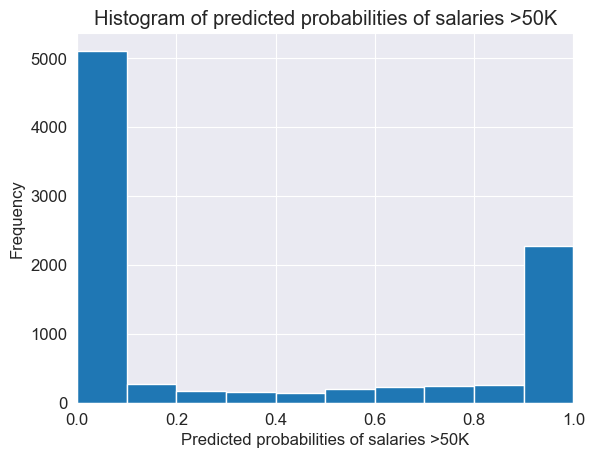

In [12]:
y_pred_prob = gnb.predict_proba(X_test)[0:10]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

gnb.predict_proba(X_test)[0:10, 1]
y_pred1 = gnb.predict_proba(X_test)[:, 1]
# adjust the font size
plt.rcParams['font.size'] = 12

# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)

# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')

# set the x-axis limit
plt.xlim(0,1)

# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')
plt.show()



Pierwsza kolumna wykresu mówi nam, że istnieje około 5000 predykcji, że income wynosi <=50k z prawdopodobieństwem poniżej 0.1
Niewielka ilość predykcji z prawdopodobieństwem powyżej 0.5, która oznacza income > 50k.
Większość predykcji przewiduje, że income wynosi <=50k.

Przprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładnosć modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski od czego zależą otrzymane wyniki

### Dla kolumn 'race' oraz 'native_country'

Model accuracy score: 0.3017
Training-set accuracy score: 0.2984
Training set score: 0.2984
Test set score: 0.3017


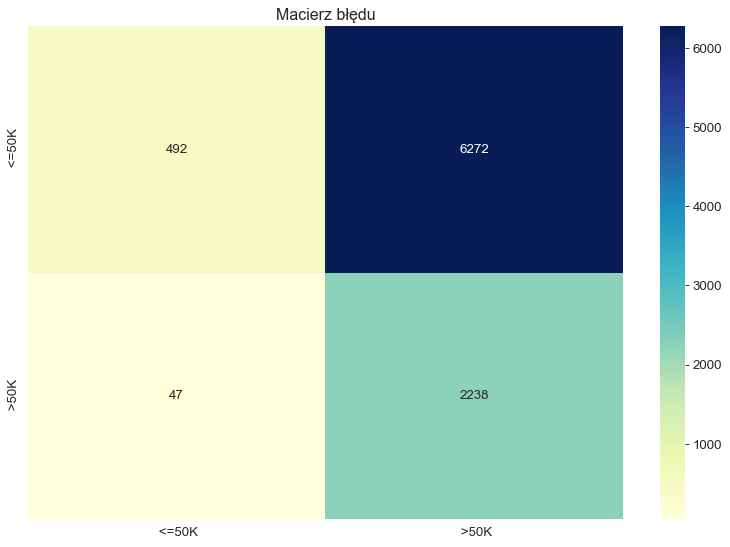

              precision    recall  f1-score   support

       <=50K       0.91      0.07      0.13      6764
        >50K       0.26      0.98      0.41      2285

    accuracy                           0.30      9049
   macro avg       0.59      0.53      0.27      9049
weighted avg       0.75      0.30      0.21      9049



In [13]:


X = df[['race', 'native_country']]
#X = df.drop('race', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship',
                             #'race', 'sex', 'native_country','income']

cols=['race', 'native_country','income']
cols.remove('income')
encoder = ce.OneHotEncoder(cols=cols)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
cols = X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()

gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

y_pred= gnb.predict(X_test)
y_pred_train = gnb.predict(X_train)

gnb.score(X_test, y_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

cm = confusion_matrix(y_test, y_pred)
#print('Confusion matrix\n\n', cm)

plt.figure(figsize=(12,8), dpi=80)
cm_matrix = pd.DataFrame(data=cm, index=gnb.classes_, columns=gnb.classes_)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Macierz błędu")
plt.show()
print(classification_report(y_test, y_pred, zero_division=0))

### Dla kolumny "race"

Model accuracy score: 0.7141
Training-set accuracy score: 0.7094
Training set score: 0.7094
Test set score: 0.7141


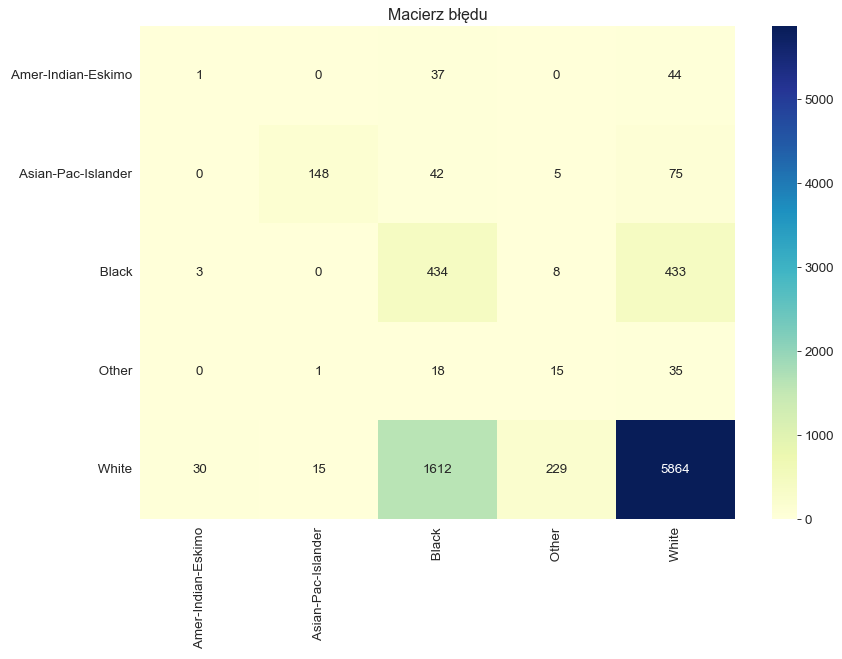

                     precision    recall  f1-score   support

 Amer-Indian-Eskimo       0.03      0.01      0.02        82
 Asian-Pac-Islander       0.90      0.55      0.68       270
              Black       0.20      0.49      0.29       878
              Other       0.06      0.22      0.09        69
              White       0.91      0.76      0.83      7750

           accuracy                           0.71      9049
          macro avg       0.42      0.41      0.38      9049
       weighted avg       0.83      0.71      0.76      9049



In [14]:
X = df.drop('race', axis=1)
y = df['race']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship',
                             'race', 'sex', 'native_country','income']
cols.remove('race')
encoder = ce.OneHotEncoder(cols=cols)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
cols = X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()

gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

y_pred= gnb.predict(X_test)
y_pred_train = gnb.predict(X_train)

gnb.score(X_test, y_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

cm = confusion_matrix(y_test, y_pred)
#print('Confusion matrix\n\n', cm)

plt.figure(figsize=(12,8), dpi=80)
cm_matrix = pd.DataFrame(data=cm, index=gnb.classes_, columns=gnb.classes_)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Macierz błędu")
plt.show()
print(classification_report(y_test, y_pred, zero_division=0))


Wnioski dotyczące analizy dla kolumny 'race':
Dokładność modelu wyniosła 71,41%. Na przekątnej macierzy błędy umieszczone są poprawne predykcję dla danej rasy. Wartości poza przekątną informują nas, że model źle dokonał predykcji i niepoprawnie określił rasę np. w 1612 przypadkach rasa biała została sklasyfikowana jako rasa czarna.


### Dla kolumny "native_country"


Model accuracy score: 0.0443
Training-set accuracy score: 0.0453
Training set score: 0.0453
Test set score: 0.0443


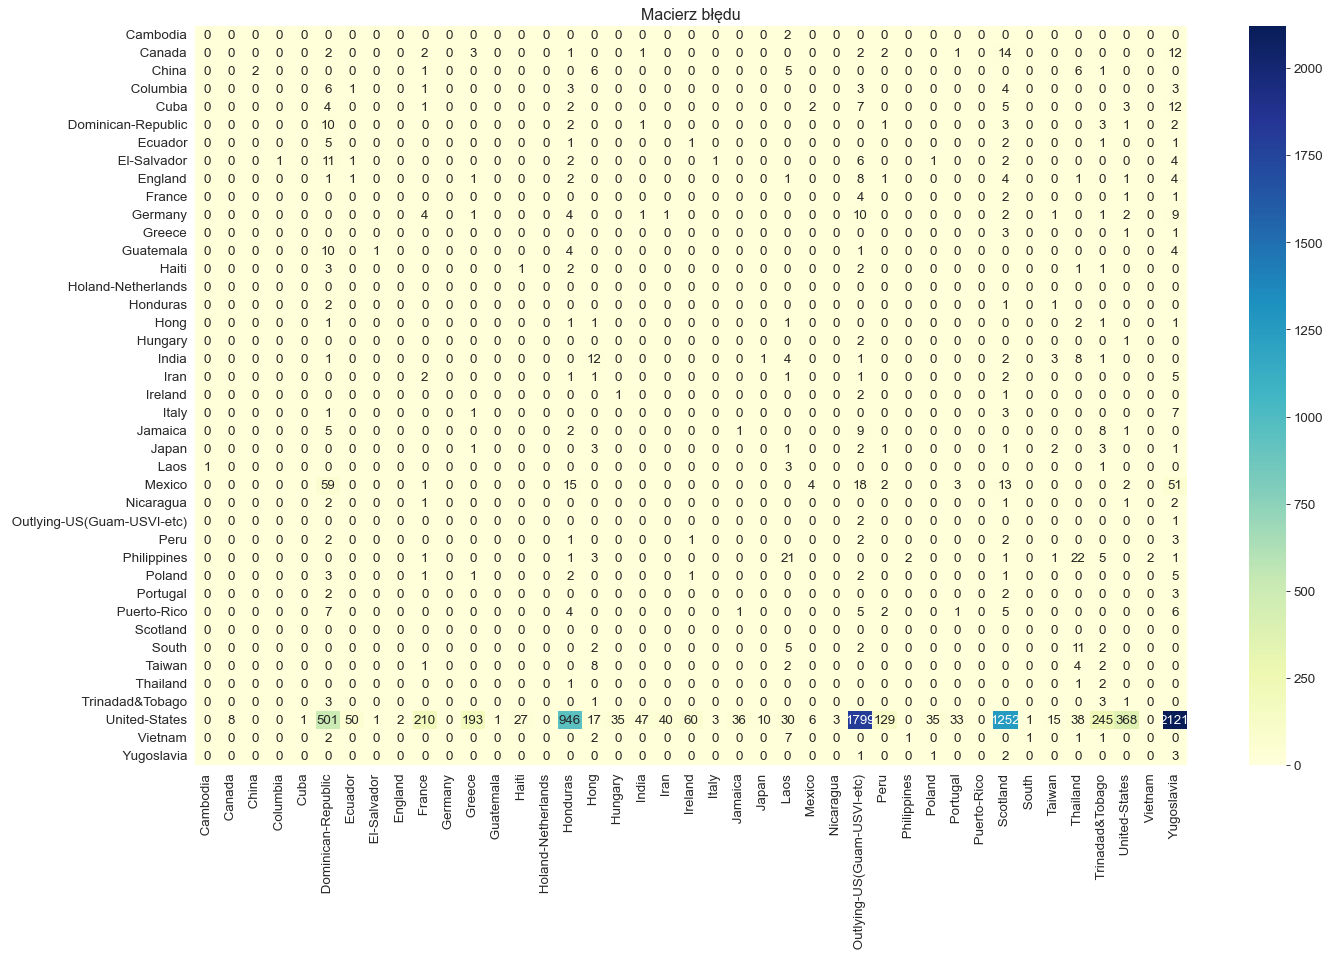

                             precision    recall  f1-score   support

                   Cambodia       0.00      0.00      0.00         2
                     Canada       0.00      0.00      0.00        40
                      China       1.00      0.10      0.17        21
                   Columbia       0.00      0.00      0.00        21
                       Cuba       0.00      0.00      0.00        36
         Dominican-Republic       0.02      0.43      0.03        23
                    Ecuador       0.00      0.00      0.00        11
                El-Salvador       0.00      0.00      0.00        29
                    England       0.00      0.00      0.00        25
                     France       0.00      0.00      0.00         8
                    Germany       0.00      0.00      0.00        36
                     Greece       0.00      0.00      0.00         5
                  Guatemala       0.00      0.00      0.00        20
                      Haiti      

In [15]:
X = df.drop('native_country', axis=1)
y = df['native_country']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship',
                             'race', 'sex', 'native_country','income']
cols.remove('native_country')
encoder = ce.OneHotEncoder(cols=cols)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
cols = X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()

gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

y_pred= gnb.predict(X_test)
y_pred_train = gnb.predict(X_train)

gnb.score(X_test, y_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)
#print('Confusion matrix\n\n', cm)

plt.figure(figsize=(20,12), dpi=80)
cm_matrix = pd.DataFrame(data=cm, index=gnb.classes_, columns=gnb.classes_)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Macierz błędu")
plt.show()

print(classification_report(y_test, y_pred, zero_division=0))


Wnioski dotyczące analizy dla kolumny 'native_country':
Dokładność tego modelu jest bardzo niska i wynosi 4.43%.
Model źle radzi sobie z klasyfikacją kolumn z dużą ilością różnych danych tzn. otrzymujemy gorszy wynik proporcjonalnie do tego ile jest przypadków np. dla kolumny income klasyfikator zwrócił w miarę dobry wynik, lecz możliwe były tylko 2 opcje: income <= 50k i income>50k a tutaj możliwe było aż 40 opcji.